## Observations and Insights 

By far, the most effective tumor drugs in the study were Capomulin and Ramicane, whose average tumor volumes at the end of the study averaged around 40 mm3, whereas the other two closely-studied drugs, Infubol and Ceftamine, had final tumor volumes averages about 60 mm3. Although there is always room for more data, the study had a reasonable amount of data and kept confounding variables to a minimum, testing mice at roughly equal gender, weight, and age ratios. Based on the conclusions drawn by this study, I would be confident submitting Capomulin and Ramicane as successful study drugs. 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined = pd.merge(mouse_metadata, study_results, how = "left", on = "Mouse ID")
# Display the data table for preview
combined.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
total_mice = len(combined["Mouse ID"].unique())
total_mice_df = pd.DataFrame({"Total Mice":[total_mice]})
total_mice_df

,Total Mice
0,249


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_mice_df = combined.loc[combined.duplicated(subset=['Mouse ID','Timepoint'])]
dup_mice_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_single = combined.loc[combined["Mouse ID"] == "g989"]
dup_single


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined.loc[combined["Mouse ID"] != "g989"]
clean_df



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
total_mice = len(clean_df["Mouse ID"].unique())
total_mice_df = pd.DataFrame({"Total Mice":[total_mice]})
total_mice_df

,Total Mice
0,248


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mean_output = clean_df.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]

median_output = clean_df.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]

sd_output = clean_df.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"]

variance_output = clean_df.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"]

sem_output = clean_df.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"]

summary_df = pd.DataFrame({"Mean": mean_output,
                          "Median": median_output,
                          "SD": sd_output,
                          "Variance": variance_output,
                          "SEM": sem_output})
summary_df





,Mean,Median,SD,Variance,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,4.994774,24.947764,0.329346
Ceftamin,52.591172,51.776157,6.268188,39.290177,0.469821
Infubinol,52.884795,51.820584,6.567243,43.128684,0.492236
Ketapril,55.235638,53.698743,8.279709,68.553577,0.603860
Naftisol,54.331565,52.509285,8.134708,66.173479,0.596466
Placebo,54.033581,52.288934,7.821003,61.168083,0.581331
Propriva,52.320930,50.446266,6.622085,43.852013,0.544332
Ramicane,40.216745,40.673236,4.846308,23.486704,0.320955
Stelasyn,54.233149,52.431737,7.710419,59.450562,0.573111


In [8]:
# Using the aggregation method, produce the same summary statistics in a single line
summary2 = clean_df.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":["mean","median","var","std","sem"]})
summary2

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

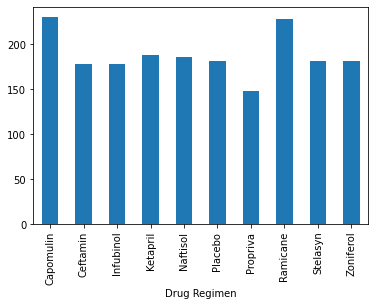

In [9]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
clean_plot = clean_df.groupby(["Drug Regimen"]).count()["Mouse ID"]

clean_plot.plot.bar()

In [10]:
clean_plot

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     148
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64

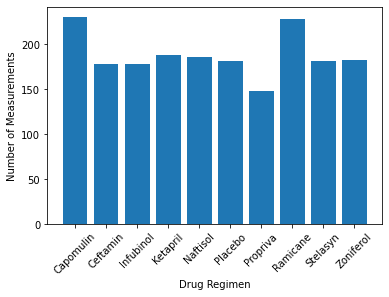

In [11]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.


plt.bar(clean_plot.index.values, clean_plot.values)
plt.xticks(rotation = 45)

plt.xlabel('Drug Regimen')
plt.ylabel('Number of Measurements')
plt.show()

In [12]:
# value counts
clean_gender = clean_df["Sex"].value_counts()
clean_gender

Male      958
Female    922
Name: Sex, dtype: int64

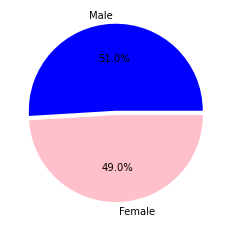

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

clean_gender = clean_df["Sex"].value_counts()
clean_gender
labels = ["Male", "Female"]
plt.pie(clean_gender.values, autopct='%1.1f%%', labels = labels, colors = ["blue", "pink"], explode = (0.05, 0))

plt.show()

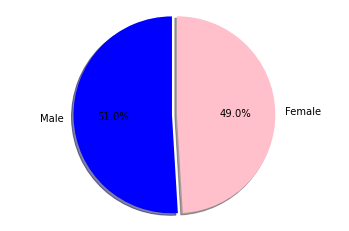

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# The values of each section of the pie chart
labels = ["Male", "Female"]
sizes = [958, 922]

# The colors of each section of the pie chart
colors = ["blue", "pink"]

# Tells matplotlib to seperate the "Humans" section from the others
explode = (0.05, 0)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, colors = colors, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')

plt.show()

## Quartiles, Outliers and Boxplots

In [29]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse

last_timepoint_df = clean_df.groupby("Mouse ID").max()["Timepoint"]
last_timepoint = last_timepoint.reset_index()
last_timepoint_df

Mouse ID
a203    45
a251    45
a262    45
a275    45
a366    30
        ..
z435    10
z578    45
z581    45
z795    45
z969    45
Name: Timepoint, Length: 248, dtype: int64

In [30]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

new_merge_df = last_timepoint.merge(clean_df, on = ["Mouse ID", "Timepoint"])
new_merge_df

,index,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,0,a203,45,Infubinol,Female,20,23,67.973419,2
1,1,a251,45,Infubinol,Female,21,25,65.525743,1
2,2,a262,45,Placebo,Female,17,29,70.717621,4
3,3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...,...
243,243,z435,10,Propriva,Female,12,26,48.710661,0
244,244,z578,45,Ramicane,Male,11,16,30.638696,0
245,245,z581,45,Infubinol,Female,24,25,62.754451,3
246,246,z795,45,Naftisol,Female,13,29,65.741070,3


In [31]:
cap_df = new_merge_df.loc[new_merge_df['Drug Regimen'] == 'Capomulin']
ram_df = new_merge_df.loc[new_merge_df['Drug Regimen'] == 'Ramicane']
inf_df = new_merge_df.loc[new_merge_df['Drug Regimen'] == 'Infubinol']
cef_df = new_merge_df.loc[new_merge_df['Drug Regimen'] == 'Ceftamin']

In [32]:
# Put treatments into a list for for loop (and later for plot labels) 
treatments = ['Capomulin', 'Infubinol','Ramicane', 'Ceftamin'] 
treatments
# Create empty list to fill with tumor vol data (for plotting)
cap_tumor_vol = [new_merge_df['Drug Regimen'] == 'Capomulin']
ram_tumor_vol = [new_merge_df['Drug Regimen'] == 'Ramicane']
inf_tumor_vol = [new_merge_df['Drug Regimen'] == 'Infubinol']
cef_tumor_vol = [new_merge_df['Drug Regimen'] == 'Ceftamin']

In [33]:
# Calculate the IQR and quantitatively determine if there are any potential outliers
# Locate the rows which contain mice on each drug and get the tumor volumes
# add subset 
# Determine outliers using upper and lower bounds

In [34]:
#Capomulin
quartiles = cap_df['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
print(f"The lower quartile for Capomulin is: {lowerq}")
print(f"The upper quartile for Capomulin is: {upperq}")
print(f"The interquartile range for Capomulin is: {iqr}")
print(f"The median for Capomulin is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile for Capomulin is: 32.37735684
The upper quartile for Capomulin is: 40.1592203
The interquartile range for Capomulin is: 7.781863460000004
The median for Capomulin is: 38.125164399999996 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


In [35]:
#Ramicane
quartiles = ram_df['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
print(f"The lower quartile for Ramicane is: {lowerq}")
print(f"The upper quartile for Ramicane is: {upperq}")
print(f"The interquartile range for Ramicane is: {iqr}")
print(f"The median for Ramicane is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile for Ramicane is: 31.56046955
The upper quartile for Ramicane is: 40.65900627
The interquartile range for Ramicane is: 9.098536719999998
The median for Ramicane is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.


In [36]:
#Infubinol
quartiles = inf_df['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
print(f"The lower quartile for Infubinol is: {lowerq}")
print(f"The upper quartile for Infubinol is: {upperq}")
print(f"The interquartile range for Infubinol is: {iqr}")
print(f"The median for Infubinol is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile for Infubinol is: 54.04860769
The upper quartile for Infubinol is: 65.52574285
The interquartile range for Infubinol is: 11.477135160000003
The median for Infubinol is: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.


In [37]:
#Ceftamine
quartiles = cef_df['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
print(f"The lower quartile for Ceftamine is: {lowerq}")
print(f"The upper quartile for Ceftamine is: {upperq}")
print(f"The interquartile range for Ceftamine is: {iqr}")
print(f"The median for Ceftamine is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile for Ceftamine is: 48.72207785
The upper quartile for Ceftamine is: 64.29983003
The interquartile range for Ceftamine is: 15.577752179999997
The median for Ceftamine is: 59.85195552 
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


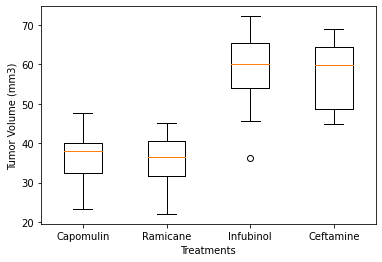

In [38]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
cap_box = cap_df['Tumor Volume (mm3)']
ram_box = ram_df['Tumor Volume (mm3)']
inf_box = inf_df['Tumor Volume (mm3)']
cef_box = cef_df['Tumor Volume (mm3)']

box_data = [cap_box, ram_box, inf_box, cef_box]
box_labels = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamine']

#fig1, ax1 = plt.subplots()
#ax1.boxplot(box_data, labels = box_labels)
#ax1.set_xlabel('Treatments')
#ax1.set_ylabel('Final Tumor Volume (mm3)')
#plt.show()

fig, ax = plt.subplots()
ax.boxplot(box_data, labels = box_labels)
ax.set_xlabel('Treatments')
ax.set_ylabel('Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

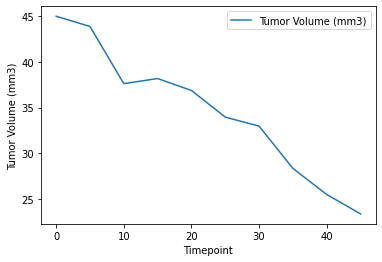

In [39]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
cap_mouse = combined.loc[combined['Mouse ID'] == 's185']
axes = cap_mouse.plot.line(x = 'Timepoint', y = 'Tumor Volume (mm3)')
plt.ylabel('Tumor Volume (mm3)')

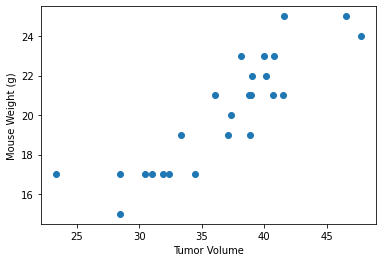

In [40]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
plt.scatter(cap_df['Tumor Volume (mm3)'],cap_df['Weight (g)'])
plt.xlabel("Tumor Volume")
plt.ylabel("Mouse Weight (g)")
plt.show()

## Correlation and Regression

In [41]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
print(f"The correlation coefficient between mouse weight and average tumor volume is {round(st.pearsonr(cap_df['Tumor Volume (mm3)'],cap_df['Weight (g)'])[0],2)}")

The correlation coefficient between mouse weight and average tumor volume is 0.88


In [ ]:
# Whew...